# Contents
  - Core Concepts of **Support Vector Machines (SVM)** 
  - How to use them
  - How they work
  
  
# ----
  - **Linear SVM Classification**
    - Soft Margin Classification
  - **Non Linear CLassification**
    - Polynomial Kernel
    - Similarity Features
    - Gaussian RBF Kernel
    - SVM Classes and Computional Complexity
  - **SVM Regression**

  

# 1. SVM 

**What is Support Vector Machine**

  - Support Vector Machine is a supervised learning algorithm. 
  - primarly used for classification problems both Linear and Non Linear types
  - can also be utilized in Regression and in outlier detection (also known as Novelty eg credit card transaction fraud)
  
**Goal of SVM**
  - to find the optimal boundary (**Hyperplane** also known as decision boundary) that separtes data points of different class in such a way the margin of separtaion between two class is high.
  - maximizing the margin(distance between the class) reduces the chance of misclassification


**When It will be useful**

  - large number of features (high dimensional space)
  - when features is in large number in comparsion too observation (rows)
  - Efficient for linear and nonlinear classifciaton
  - works well when there is clear margin of separtaion
  
  
**When not useful**
  
   - slow with large datasets
   - choosing the right kernel function and tuning its hyperparameter can be tricky
   - Not effective when there is overlap between classes
   
**Examples**
  
  - Outlier detection in high-dimensional datasets
  - image classification
  - spam detection

# 2. Linear SVM Classification

**Def**
- its a specific type of SVM classifcation, that is used to classify linear separable data
- In this context data can be divided by straight line(2D), plane (3D) or hyperplane (higher dimensons)


**Key Terminology**

- **Hyperplane**
   - its defined by eqn w*x + b
      - w: weight vector (normal to hyperplane)
      - x: Feature Vector
      - b: bias term
   - goal of linear SVM is to find optimal hyperplane that maximizes the the margin between the two classes

- **Support Vector**
   - the data points that closet to the hyperplane are crucial in defining position of hyperplane.
   - these closet points(instances) are called support vector
   - the SVM algorithm focuses on these data points because these are the ones that affect the decision boundary the most

- **Maximizing the Margin**
   - the margin is the distance between the hyperplane and the support vectors 
   - Linear SVM aims in maximizing this distance, leading to better generalization of unseen data


- **Mathematical Formualtion**

   - Assume 
      - Features vector X<sub>i<sub> 
      - Target feature (-1,1) as label : y<sub>i<sub>
   
    - Goal is to find w and b such that is following condition is satisfied
         - y_i(W^T.X_i + b) >= 1 
    
    - to maximize the margin, we minimize the following objective function
       - min1/2||w||<sup>2<sup>
       - subject to the constraint y_i(W^T.X_i + b) >= 1 
    
    
    
  


## 2.1 Soft Margin Classification

 - if all the instances is on the correct side, its called **Hard Margin classification**
     - HMC, Works only if the data is linear separable
     - It is senstive to outliers
     - real world, its very rare to find totaly linear separable data
     
  - To avoid these issues, we need more flexible model,
  - Objective: to find a good balance between keeping the margin plane area, 
                - as large as possible
                - and limiting the violations( instances end up in middle of margin plane area or in wrong side)
  - this is called soft margin classification
  
  


  - the soft margin classification Regularization 
     - Regularization meaning: 
         - In machine learning world, is a techinque to prevent the model from overfitting
         - by adding additional constraints and penalites to the model when its training
         - it helps in improving model abilty to generalize to unseen data by dicouraging overly complex models
     - **Soft Marging Classification Regularization parameter 𝐶**
          - It controls the trade-off between **maximizing the margin** and **minimizing the classification error**.
          - **Value of C**
             - **Smaller Value of C:** allows more misclassifications and results in a wider margin
             - **Large Value of C:** Prioritizes correctly classifying as many points as possible, potentially leading to a narrower margin
             - As the value of C increases the margin decreases thus Hard SVM.
             - If the values of C are very small the margin increases thus Soft margin VM.
     
 

- Cost Function for 
    - min1/2||w|| + C* summation((from i to n), ξ_i)
       - c:  regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
       - ξ_i :are slack variables that measure the degree of misclassification for each data point
    

In [1]:
# Use SVM classifier to detect Iris Virginica Flowers

from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame = True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2) #making true for class iris virginica and other false

In [2]:
#initialize the svm classifier

svm_clf = make_pipeline(StandardScaler(),
                       LinearSVC(C = 1 , random_state = 42))

svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
# lets predict some class
X_new = [[5.5, 1.7], 
         [5.0, 1.5]]

svm_clf.predict(X_new)

# here first classified as iris virginica while second is not

array([ True, False])

In [4]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

- unlike Logistic Regression, LinearSVC doesn't have predict_proba() method to estimate the class probalities
- But with SVC, by setting the probabilty (hyperparameter) True, then model will fit an extra model at the end of training to map the SVM decisions functions scores to estimate the probabilities
- Under the hood, this requires 5 fold cross validation to generate out of sample predications for every instance in training set, then training a logisitc model,so it will slow down training considerably
- After that predict_proba() and Predicat_log_proba() methods will be available

# ----

Then why we will use SVC

  - Kernel Trick: SVC can use different kernels (e.g., polynomial, radial basis function) to model complex decision boundaries. This allows SVC to capture non-linear relationships in the data, which logistic regression cannot do unless transformed features are manually introduced.
  - Flexibility: With different kernels, SVC can be adapted to various datasets without the need for explicit feature engineering.
  
  - Robustness: SVC focuses on maximizing the margin between classes, which can lead to better generalization on unseen data, especially in high-dimensional spaces
  
  - Handling Outliers: The SVM framework is robust to outliers due to the use of the support vectors for determining the decision boundary.
  
  - Effective in High Dimensions: SVC performs well when the number of features is greater than the number of samples, making it suitable for text classification and bioinformatics, where datasets often have thousands of features.
  
  - Support for Multi-class Classification:SVC can handle multi-class classification problems through strategies like one-vs-one or one-vs-all. This makes it suitable for applications with more than two classes
  
  - Regularization: SVC provides a way to control overfitting through its regularization parameter 𝐶. This can be beneficial in datasets where the balance between bias and variance is crucial.

**Kernel**
  - a kernel in the machine learning context is a function that facilitates the computation of similarities between data points, enabling models to learn complex patterns in high-dimensional spaces without explicitly transforming the data. 
  - By using kernels, machine learning algorithms can achieve greater flexibility and efficiency in various tasks

# 3. Non Linear SVM Classification

- Non linear SVM is an extension of standard SVM, that can handle non-linear separable data.
- Unlike linear SVM, which aims to find a linear decision boundary between classes, 
- Non-linear SVM employs kernel functions to map the original input space into a higher-dimensional feature space where a linear decision boundary can be found.

In [5]:
# Lets visualize Non Linear SVM classification

x_1 = range(-4,5,1)
y_1 = [0]*9

y_2 = []

for i in range(len(x_1)):
    y = x_1[i] ** 2
    y_2.append(y)
#     print(y_2)
               

print(list(x_1))
print(y_1)
print(y_2)






[-4, -3, -2, -1, 0, 1, 2, 3, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[16, 9, 4, 1, 0, 1, 4, 9, 16]


In [6]:
# import matplotlib.pyplot as plt

# plt.plot(list(x_1), y_1, marker = 'o', label = 'y_1',color = 'red')
# plt.plot(list(x_1), y_2, marker = 'x', label = 'y_2', color = 'blue')

# # Add labels and title
# plt.xlabel('x_1 values')
# plt.ylabel('y values')
# plt.title('Plot of y_1 and y_2')

# # Add a horizontal line at y = 6
# plt.axhline(y=6, color='green', linestyle='--', label='y = 6')  # Dashed green line


# plt.axhline(0, color='black',linewidth=0.5, ls='--')  # Add a horizontal line at y=0
# plt.axvline(0, color='black',linewidth=0.5, ls='--')  # Add a vertical line at x=0
# plt.grid()  # Add grid
# plt.legend()  # Add legend






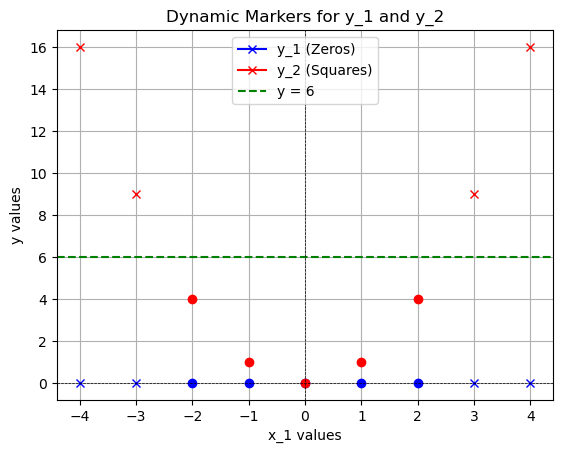

In [8]:

import matplotlib.pyplot as plt
# Define markers based on conditions
markers = ['x' if value in [-4, -3, 3, 4] else 'o' for value in x_1]

# Plot y_1 with the specified markers
for i in range(len(x_1)):
    plt.plot(x_1[i], y_1[i], marker=markers[i], color='blue', label='y_1 (Zeros)' if i == 0 else "")
    
# Plot y_2 with the specified markers
for i in range(len(x_1)):
    plt.plot(x_1[i], y_2[i], marker=markers[i], color='red', label='y_2 (Squares)' if i == 0 else "")
    

# Add a horizontal line at y = 6
plt.axhline(y=6, color='green', linestyle='--', label='y = 6')  # Dashed green line

# Add labels and title
plt.xlabel('x_1 values')
plt.ylabel('y values')
plt.title('Dynamic Markers for y_1 and y_2')
plt.axhline(0, color='black', linewidth=0.5, ls='--')  # Add a horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5, ls='--')  # Add a vertical line at x=0
plt.grid()  # Add grid
plt.legend()  # Add legend

# Show the plot
plt.show()

**Here we can see that** 
- in starting we cannot sepearte the x_1 (x and o markers/class) values by a hyperplane
- but after squaring we can separte the classes

- **example: non-linear SVM employs kernel functions to map the original input space into a higher-dimensional feature space where a linear decision boundary can be found**

In [10]:
# another example

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

In [12]:
polynomial_svm_clf = make_pipeline(
PolynomialFeatures(degree = 3),
    StandardScaler(),
    LinearSVC(C = 10, max_iter = 10000, random_state = 42)
)

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

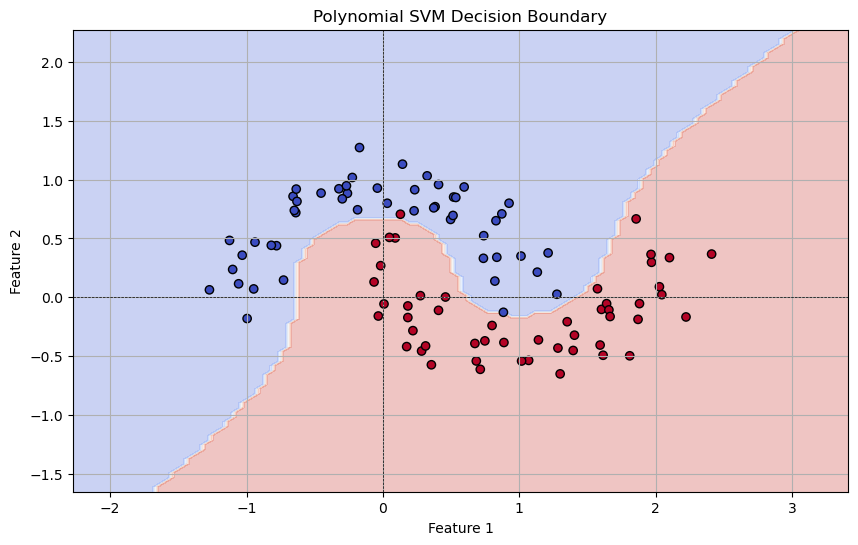

In [13]:
# Define the plot function
import numpy as np
def plot_decision_boundary(clf, X, y):
    # Create a mesh to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict using the classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Polynomial SVM Decision Boundary')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(polynomial_svm_clf, X, y)

## 3.1 Polynomial Kernel

- in SVM, Polynomial Kernel used to model non-linear relationships by transforming data into higher dimensional space
- Polynomial Kernel allows the SVM, to find a non-linear decision boundary that can classify data points more effectively when linear boundary doesn't suffice

- instead of adding polynomial features, **Polynomial kernel** applies the transformation implicity, which can be more efficient 

- Polynomial kernel is particularly useful for datasets where the decision boundary is curved or complex but follows a polynomial pattern

In [15]:
# lets see how to utilize it

from sklearn.svm import SVC
poly_kernel_svc_clf = make_pipeline(
StandardScaler(),
SVC(kernel = "poly", # polynomial kernel is used.
   degree = 3,
   coef0 = 1,
   C = 5)    
)

**1. Degree -----**

- the degree parameter in the polynomial kernel of an SVM determines the degree of the polynomial function that is used to map the input features into a higher-dimensional space
- it defines how complex the decision boundary can be.
- Choosing the appropriate degree is crucial
    - Too low of a degree (like 1) might underfit the data, failing to capture the true relationship.
    - Too high of a degree might overfit, especially in noisy datasets, by creating an overly complex decision boundary
- tune the degree of the polynomial kernel using cross-validation to find the best fit for your specific problem
    

**2. C  -----**
- Its regularization parameter that controls bewtween
   - **Maximizing margin** - the distance between the decision boundary and the closest data points
   - **Minimizing classification errors** - misclassifications or points inside the margin


- Think of C as a penalty for misclassifying points or allowing points within the margin
   - **High C**: 
       - The penalty for misclassification is high, so the model tries hard to classify every point correctly, even at the expense of a smaller margin.
       - With high C, you might see the boundary hugging the data points closely, often resulting in small margins
       - example , C:100
  
   - **Low C**: 
     - The penalty for misclassification is low, so the model allows for some points to be misclassified (or lie inside the margin) in exchange for a larger margin and better generalization
     - With low C, the boundary is smoother and more distant from the data points, resulting in larger margins but possibly misclassifying some points.
     - example c = 0.1
        
        

**3. Coef0  -----**
- The coef0 parameter in the polynomial kernel (and also in the sigmoid kernel) controls the influence of higher-degree terms in the polynomial. It determines how much the model accounts for the interaction between the input features (the higher-degree terms) versus the individual features.

- The coef0 parameter is particularly useful when you want to control the bias of the model toward simpler or more complex decision boundaries

  - A low value of coef0 makes the model behave more like a linear classifier (even if the degree is greater than 1).
  - A high value of coef0 amplifies the higher-degree terms, allowing the model to capture more complex patterns
  

## 3.2 Similarity Features

- Another technique to tackle nonlinear problems is to add features computed using a similarity function, which measures how much each instance resembles a particular landmark
- SVM uses similarity features based on how close or similar data points are in some space, potentially a higher-dimensional space

**lets visualize with Example**

**1, Scenario:**
- Imagine you have two hills:
   - Hill A represents Class A.
   - Hill B represents Class B.
   
- several people standing around the hills, 
- and you want to classify each person into Class A (closer to Hill A) or Class B (closer to Hill B). 
- The decision will be based on their distance from the two hills. 
- In this context, similarity features refer to how we compare the distance of each person to both hills

**2. Data Points (People):**

   - Each person represents a data point. Let's say you measure their position in terms of their distance from Hill A and distance from Hill B.

**3. Similarity Measure (Distance):**

- The similarity in this case is measured by distance. 
   - If a person is very close to Hill A, we would say they are "more similar" to Hill A and therefore likely to belong to Class A.
    - Similarly, if a person is closer to Hill B, they are "more similar" to Hill B and are likely to belong to Class B.

**4. Classification:**

- To classify each person, we use similarity features based on their distance from Hill A and Hill B. 
- If someone is closer to Hill A than to Hill B, they’ll be classified into Class A. 
- If they are closer to Hill B, they’ll be classified into Class B.

**SVM's Role:**

- SVM calculates these similarity features and finds the best possible decision boundary (let's imagine a straight line or curved boundary between the two hills) that maximizes the margin between the people classified as belonging to Class A (closer to Hill A) and Class B (closer to Hill B)

## 3.3 Gausian RBF Kernel

- Polynomial features method and Similarity features method can be useful to any machine learning algorithm. But it may be computationally expensive to compute all additional features

- The RBF kernel is a specific type of similarity feature kernel that measures similarity based on distance and is very effective for non-linear SVM problems. On the other hand, similarity feature kernels is a broader concept, encompassing different ways to measure how alike two data points are, based on either distance, feature values, or other domain-specific similarities.

- Hyperparameter 𝛾

- The 𝛾 parameter in the RBF kernel controls the influence of individual training points:

  - Low γ: The model considers points far apart as similar, leading to a smoother and more generalized decision boundary.
  - High γ: The model focuses more on points close to the decision boundary, leading to a more complex, potentially overfitting model.
  
   - **small γ makes the decision boundary smoother**.
   - **large γ makes the decision boundary more flexible and intricate (can overfit)**
    - Need to carefully tune the hyperparameters, especially γ, to prevent overfitting (if γ is too high) or underfitting (if γ is too low).
  
  

## 3.4 Other Kernels

- other kernels exists but are used rarely
- String Kernels are sometimes used when classifying text documents or DNA Sequences
  - it use Levenshtein Distance

## 3.5 So Many Kernels, which one to use

As Rule of thumb 
  - **First always try Linear Kernel**, 
  - LinearSVC is much faster than SVC(kernel = 'linear'), espically if the **training set is very large**
  - **if data set is not large**, 
     - we should try  Gaussian RBF Kernel, it often works really well
   - if you spare time and computing power, you can experiment with a few other kernels using hyperparameter search


# 4. SVM Regression

- SVM Regression (SVR) works by finding a line (or plane/hyperplane in higher dimensions) such that most data points fall within a margin of tolerance (𝜀) around the hyperplane. 

- Points within this margin do not contribute to the model's loss function.
   - The aim is to minimize the margin violations, i.e., instances where data points fall outside the 𝜀-tube.
   - The width of the margin (𝜀-tube) is controlled by the epsilon (𝜀) hyperparameter.
  - Reducing 𝜀 increases the number of support vectors, which adds more constraints to the model and serves as a form of regularization.
  
     - Fewer support vectors = better generalization (if too few, it can underfit).
     - More support vectors = tighter fit to the data (but might overfit if too many are considered)
     
**Key Concepts  -----**

- Margin of Tolerance (epsilon, 𝜀): In SVR, we define a margin of tolerance 𝜀, within which predictions are considered "good enough." The model tries to fit as many points as possible within this margin while ensuring that the deviation from the actual values is minimal

- Support Vectors: Just like in classification, support vectors are the data points that lie on the boundary or outside the 𝜀 margin. These points are the most important for determining the regression line

- Regularization (C): SVR also uses a regularization parameter C that determines the trade-off between achieving a low error within the tolerance and keeping the model simple (i.e., having a larger margin)

- Kernels: SVR can use various kernel functions (linear, polynomial, RBF) to model nonlinear relationships in the data. A kernel trick transforms the data into a higher-dimensional space, where it becomes easier to fit the regression line
        
**How it works ----**

- SVR aims to minimize the error between the predicted and actual values but ignores errors that are within the epsilon margin (soft margin).
- The objective is to find a hyperplane that maximizes the margin, while allowing some points to lie outside the margin if needed (depending on the value of 𝐶)



- In SVM (classification), the decision boundary is the hyperplane separating classes, and the margin is the space between this boundary and the closest data points (support vectors).
- In SVR (regression), there is no decision boundary, but the margin (𝜀-tube) is the region around the regression line within which prediction errors are allowed without penalty.

In [26]:
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset("tips")

print(tips.head())
print(tips.shape)

X = tips[['total_bill', 'size']]
y = tips[['tip']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = .2)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
(244, 7)


In [27]:
# code for Support vector regression

from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline

svm_reg = make_pipeline(
                        StandardScaler(),
                        LinearSVR(epsilon = 0.5, random_state = 42))
svm_reg.fit(X_train,y_train)

/Users/saajanrajak/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [35]:
y_train_pred = svm_reg.predict(X_train)
y_test_pred = svm_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)


train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)

print('Train_RMSE', train_rmse)
print('test_RMSE',test_rmse)

print("Train R2 Score", train_r2_score)
print('Test R2 Score', test_r2_score)

Train_RMSE 1.057081504200144
test_RMSE 0.7926716140367199
Train R2 Score 0.4500087553373161
Test R2 Score 0.49732584664775037


In [36]:
# lets check target value range for better understanding of rmse value
y.describe()

,tip
count,244.000000
mean,2.998279
std,1.383638
min,1.000000
25%,2.000000
50%,2.900000
75%,3.562500
max,10.000000


- Train RMSE (1.05): This indicates that, on average, the model's predictions on the training data are off by about 1.05 units from the actual tips. Given that the mean tip is around 2.998 and the data ranges from 1 to 10, this seems like a reasonably good fit.
- Test RMSE (0.7): This indicates that, on average, the model's predictions on the test data are off by 0.7 units from the actual tips. Since this error is even lower than the training error, your model is performing quite well on unseen data (test data)

- Train R² (0.4500): Approximately 45% of the variance in the training data can be explained by the model. This indicates a moderate fit; the model captures some relationships but also leaves a substantial amount of variance unexplained.

- Test R² (0.4973): About 49.7% of the variance in the test data is explained by the model, which is slightly better than the training data. This further reinforces that the model generalizes well, as it explains more variance in the test set than in the training set.
    
    
- R² Measures the proportion of variance in the target variable that is explained by the model
   - R² ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no explanatory power.
   - It can also be negative if the model performs worse than the mean of the data.

In [39]:
# Lets use it kernel

from sklearn.svm import SVR

svm_poly_reg = make_pipeline(StandardScaler(),
                            SVR(kernel = 'poly', degree = 2, 
                               C = 0.01, epsilon = 0.1))

svm_poly_reg.fit(X_train, y_train)

/Users/saajanrajak/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

In [41]:
y_train_pred_poly = svm_poly_reg.predict(X_train)
y_test_pred_poly = svm_poly_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

train_mse_poly = mean_squared_error(y_train, y_train_pred_poly)
test_mse_poly = mean_squared_error(y_test, y_test_pred_poly)

train_rmse_poly = np.sqrt(train_mse_poly)
test_rmse_poly = np.sqrt(test_mse_poly)


train_r2_score_poly = r2_score(y_train, y_train_pred_poly)
test_r2_score_poly = r2_score(y_test, y_test_pred_poly)

print('Train_RMSE_poly', train_rmse_poly)
print('test_RMSE_poly',tbest_rmse_poly)

print("Train R2 Score_poly", train_r2_score_poly)
print('Test R2 Score_poly', test_r2_score_poly)

Train_RMSE_poly 1.3385743504041308
test_RMSE_poly 1.0994426785465485
Train R2 Score_poly 0.11809089646271964
Test R2 Score_poly 0.0329584690233059


In [69]:
# Lets use it kernel

from sklearn.svm import SVR

svm_rbf_reg = make_pipeline(StandardScaler(),
                            SVR(kernel = 'rbf', 
                               C = 10, epsilon = 0.1))

svm_rbf_reg.fit(X_train, y_train)

/Users/saajanrajak/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=10))])

In [70]:
y_train_pred_rbf = svm_rbf_reg.predict(X_train)
y_test_pred_rbf = svm_rbf_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

train_mse_rbf = mean_squared_error(y_train, y_train_pred_rbf)
test_mse_rbf = mean_squared_error(y_test, y_test_pred_rbf)

train_rmse_rbf = np.sqrt(train_mse_rbf)
test_rmse_rbf = np.sqrt(test_mse_rbf)


train_r2_score_rbf = r2_score(y_train, y_train_pred_rbf)
test_r2_score_rbf = r2_score(y_test, y_test_pred_rbf)

print('Train_RMSE_rbf', train_rmse_rbf)
print('test_RMSE_rbf',test_rmse_rbf)

print("Train R2 Score_rbf", train_r2_score_rbf)
print('Test R2 Score_rbf', test_r2_score_rbf)

Train_RMSE_rbf 0.9603610026230917
test_RMSE_rbf 0.747283402263476
Train R2 Score_rbf 0.5460501670244313
Test R2 Score_rbf 0.55324377201895


**Interpretation    ----**


- results from your RBF kernel SVR model show improvements compared to the previous polynomial kernel model, and they are more comparable to  linear SVR model.

- Low RMSE Value
- High R2 score value


**C Parameter:**

- The C parameter controls the trade-off between achieving a low training error and a low testing error.
- Setting C = 10 indicates a stronger emphasis on minimizing training error, allowing the model more flexibility to fit the training data while still trying to generalize well to the test data. A higher value of C generally leads to a more complex model that can fit the training data better, which is reflected in the lower RMSE and higher R² scores.


**Epsilon Parameter:**

- The epsilon (ε) parameter defines the margin of tolerance where no penalty is given to errors. An epsilon value of 0.1 means that predictions can deviate from the actual values by up to 0.1 without incurring a loss. This choice of epsilon helps create a wider margin for error, making the model more robust to noise in the data.
- This value strikes a balance, allowing the model to ignore small errors while still being sensitive to larger deviations, which can help with both training and test performance

**Future Steps**
- perhaps using Grid Search for finding best C and Epsilon value